### 2.2.2 線形モデル

**回帰**
- 2次元平面であれば、1本の線で近似
- 3次元空間であれば、1枚の平面で近似
- N次元空間であれば、N-1次元の超平面で近似

**クラス分類**
- 2次元平面であれば1本の線で領域を区切る
- 3次元であれば1枚の平面で領域を区切る
- N次元空間であれば N-1次元の超平面で区切る

大したことはできないように思うかもしれないが、高次元空間ではかなり強力

#### 線形回帰 - LinearRegression

- 1次元データの場合を考える。
- 横軸が説明変数、縦軸が目標変数

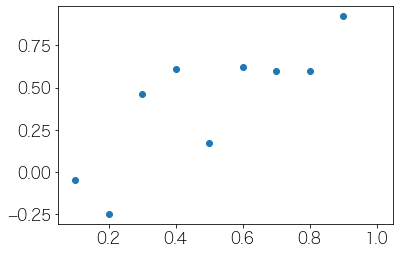

In [93]:
# hide
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.lines import Line2D

X = np.arange(0,1,0.1)
y = X + np.random.normal(0, 0.2, size=X.shape)
X = X.reshape(-1,1)
ax = plt.gca()
ax.scatter(X[:,0], y)
ax.set_xlim(0.05, 1.05)
None

- 直線で近似する
- 各データ点と直線で近似された点の距離を考る
- この距離を2乗して足し合わせたものが最小になるように、直線を定める。


(0.05, 1.05)

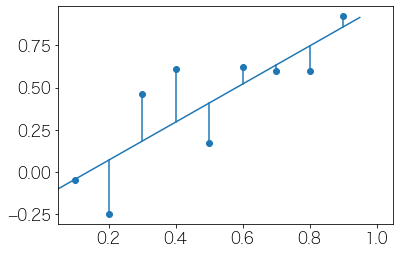

In [94]:
# hide
mdl = LinearRegression()
mdl.fit(X, y)
def draw_line(ax, start, end):
    line = Line2D([start[0], end[0]], [start[1], end[1]])
    ax.add_line(line)
ax = plt.gca()
ax.scatter(X[:,0], y)
X0 = np.arange(-0.05, 1.05, 0.1)
ax.plot(X0,  X0 * mdl.coef_ + mdl.intercept_)
for x, y in zip(X[:, 0], y):
    draw_line(ax, (x, y), (x, x * mdl.coef_[0] + mdl.intercept_))
ax.set_xlim(0.05, 1.05)

#### 実行例

以下のデータセットに対して線形回帰を行う。

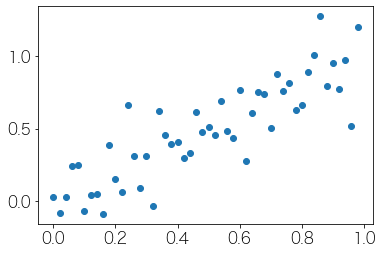

In [95]:
# hide
import numpy as np
import matplotlib.pyplot as plt
X = np.arange(0,1,0.02)
y = X + np.random.normal(0, 0.2, size=X.shape)
X = X.reshape(-1,1)
plt.scatter(X[:,0], y)
None

In [96]:
# hideoutput
# データの確認
X, y

(array([[0.  ],
        [0.02],
        [0.04],
        [0.06],
        [0.08],
        [0.1 ],
        [0.12],
        [0.14],
        [0.16],
        [0.18],
        [0.2 ],
        [0.22],
        [0.24],
        [0.26],
        [0.28],
        [0.3 ],
        [0.32],
        [0.34],
        [0.36],
        [0.38],
        [0.4 ],
        [0.42],
        [0.44],
        [0.46],
        [0.48],
        [0.5 ],
        [0.52],
        [0.54],
        [0.56],
        [0.58],
        [0.6 ],
        [0.62],
        [0.64],
        [0.66],
        [0.68],
        [0.7 ],
        [0.72],
        [0.74],
        [0.76],
        [0.78],
        [0.8 ],
        [0.82],
        [0.84],
        [0.86],
        [0.88],
        [0.9 ],
        [0.92],
        [0.94],
        [0.96],
        [0.98]]),
 array([ 0.02860894, -0.08445072,  0.02820234,  0.24302022,  0.25080471,
        -0.0690053 ,  0.03996175,  0.05000243, -0.08862849,  0.3894423 ,
         0.15094945,  0.06086129,  0.66026586,  0.31

In [97]:
# 訓連データとテストデータを分割する
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((37, 1), (13, 1))

LinearRegressionを用いる。

In [98]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl.fit(X_train, y_train)


LinearRegression()

近似した直線は、モデルから取得できる。

In [99]:
mdl.coef_, mdl.intercept_

(array([1.01542625]), -0.0003292858517518482)

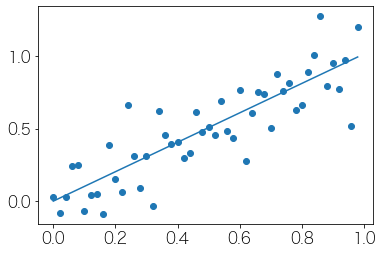

In [100]:
plt.scatter(X[:,0], y)
plt.plot(X[:,0], X[:,0] * mdl.coef_ + mdl.intercept_)

結果は$R^2$ Score で評価する。

In [101]:
mdl.score(X_test, y_test)

0.7126223381796465

#### 線形クラス分類 - LogisticRegression
Regression という名前だが回帰ではなくクラス分類アルゴリズム

In [102]:
# hide
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Hiragino Sans"
plt.rcParams["font.size"] = 16

以下の点群を分離することを考える

'2つのクラス'

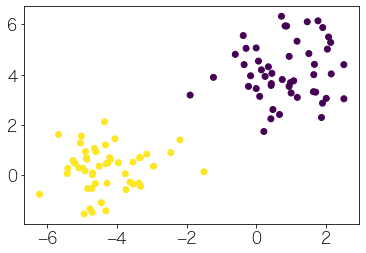

In [119]:
# hide
X, y = make_blobs(random_state=3, centers=2)
plt.scatter(X[:, 0], X[:, 1], c=y)
"2つのクラス"

ロジスティック回帰による分離を行う

注意: 「ロジスティック回帰」は*回帰手法ではない*。2クラス分類手法

In [120]:
# ロジスティック回帰による分離
mdl = LogisticRegression()
mdl.fit(X, y)

LogisticRegression()

'ロジスティック回帰による分類'

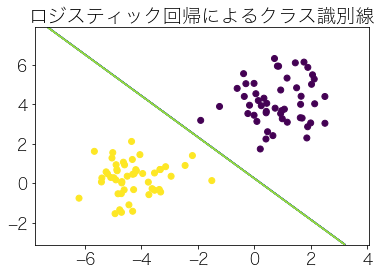

In [121]:
# hide
import numpy as np
def plt_predict_line(model, X, axe, label):
    eps =  X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)    
        
    grid = np.meshgrid(xx, yy)
#    g = [[x, y] for x, y in zip(np.hstack(grid[0]), np.hstack(grid[1]))]
    g = np.c_[grid[0].ravel(), grid[1].ravel()]
    p_g = model.predict(g)
   # axe.scatter(grid[0], grid[1], c = p_g)
    axe.contour(grid[0], grid[1], p_g.reshape(grid[0].shape))
    axe.set_title(label)

ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=y)
plt_predict_line(mdl, X, ax, "ロジスティック回帰によるクラス識別線")
'ロジスティック回帰による分類'

#直線では分離できないクラス

'直線では分離できないクラス'

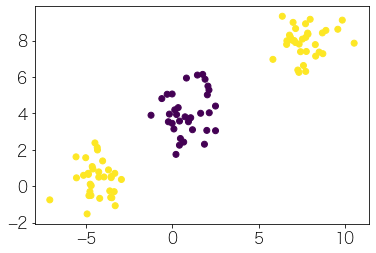

In [122]:
# hide
X, y = make_blobs(random_state=3, centers=3)
y[y == 2] = 1
plt.scatter(X[:, 0], X[:, 1], c=y)
"直線では分離できないクラス"

'ロジスティック回帰による分類'

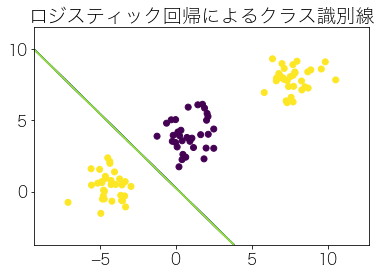

In [123]:
# hide
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=y)
plt_predict_line(mdl, X, ax, "ロジスティック回帰によるクラス識別線")
'ロジスティック回帰による分類'

1つ目の特徴量の2乗を追加して、3次元のデータにする

(100, 3)


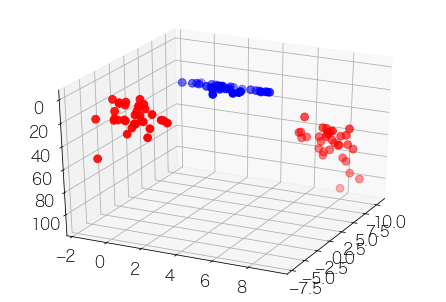

In [124]:
# hide
X_new = np.hstack([X, X[:, :1] ** 2 ])
print(X_new.shape)

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', s=60)

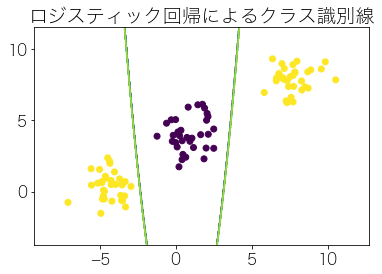

In [125]:
# hide
mdl = LogisticRegression()
mdl.fit(X_new, y)

ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=y)

def plt_predict2(model, X, axe, label):
    eps =  X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)    
        
    grid = np.meshgrid(xx, yy)
#    g = [[x, y] for x, y in zip(np.hstack(grid[0]), np.hstack(grid[1]))]
    g = np.c_[grid[0].ravel(), grid[1].ravel(), grid[0].ravel() ** 2]
    p_g = model.predict(g)
   # axe.scatter(grid[0], grid[1], c = p_g)
    axe.contour(grid[0], grid[1], p_g.reshape(grid[0].shape))
    axe.set_title(label)

plt_predict2(mdl, X, ax, "ロジスティック回帰によるクラス識別線")

特徴量エンジニアリングによって高次元化することで、線形モデルで強力な分離が可能

#### 実例: 乳癌の悪性/良性識別

In [111]:
# データセットの読み込み
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd

cancer = load_breast_cancer()
ss = StandardScaler()
pd.DataFrame(cancer.data, columns=cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [112]:
# 訓連・テスト データセットを分割
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [113]:
# 標準化
ss.fit(X_train)
X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)

In [114]:
# 訓連
mdl = LogisticRegression()
mdl.fit(X_train_s, y_train)

# 予測
y_predict = mdl.predict(X_test_s)

In [115]:
# hideout
# 予測結果
y_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [116]:
# 結果の評価
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.958041958041958